In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.constants

## Profile trapping potential

In [2]:
a_2 = 0.1
a_3 = -0.1
a_4 = 0.1
y_0 = 30

In [71]:
def Trap_profile(x,y,z):
    B_T = [2*a_3*math.sqrt(14/(3*math.pi))*x*z/(y_0**2), 
           3*a_4*math.sqrt(35/math.pi)*z*(0.5*z**2-1.5*y**2)/(8*y_0**3) 
           - a_3*math.sqrt(7/(6*math.pi))*z*y/y_0**2 + a_2*math.sqrt(15/math.pi)*z/(4*y_0), 
           3*a_4*math.sqrt(35/math.pi)*y*(1.5*z**2-y**2)/(8*y_0**3) 
           + a_3*math.sqrt(7/(6*math.pi))*(2*x**2-0.5*y**2-1.5*z**2)/y_0**2 
           + a_2*math.sqrt(15/math.pi)*y/(4*y_0)]
    return B_T

def magnetic_field_strength(x,y,z):
    B_T = Trap_profile(x,y,z)
    return math.sqrt(np.dot(B_T, B_T))

## Trapping potential strength

In [3]:
density = 3500 #kg/m^3
epsilon = 5.1 #the dielectric constant of diamond
dipmom_constant = 10**(-4)*scipy.constants.e # dipole moment for 10 um sphere
mu0 = scipy.constants.mu_0
chid = -6.2e-9

In [4]:
def Casimir(mass, z):
    R = (3*mass/(density*4*math.pi))**(1/3)
    V_C = - (3*scipy.constants.hbar*scipy.constants.c/(8*math.pi))*((epsilon-1)/(epsilon+2))*R**3/z**4
    F_C = - (3*scipy.constants.hbar*scipy.constants.c/(2*math.pi))*((epsilon-1)/(epsilon+2))*R**3/z**5
    return V_C, F_C

In [5]:
def Dipole(dipmom, theta, z):
    V_D = - dipmom**2*(1+np.cos(theta)**2)/z**3
    F_D = - 3*dipmom**2*(1+np.cos(theta)**2)/z**4
    return V_D, F_D

In [87]:
mass_range = np.logspace(-16, -13, num=40, endpoint=True)
z = 30e-6 # in meters
dip_mass_dep = True

if dip_mass_dep:
    B_z_mdep, dB_z_mdep = [], []
else:
    B_z, dB_z = [], []

for i in range(len(mass_range)):
    mass = mass_range[i]
    
    if dip_mass_dep:
        dip_mag = dipmom_constant*((3*mass/(density*4*math.pi))/((10e-6)**3))
    else:
        dip_mag = dipmom_constant
        
    V_C, F_C = Casimir(mass, z)
    V_D, F_D = Dipole(dip_mag, 0, z)
    
    if dip_mass_dep:
        B_z_mdep.append(math.sqrt(2*mu0*(V_C+V_D)/(mass*chid))) 
        dB_z_mdep.append(mu0*(F_C+F_D)/(mass*chid*math.sqrt(2*mu0*(V_C+V_D)/(mass*chid))))
    else:
        B_z.append(math.sqrt(2*mu0*(V_C+V_D)/(mass*chid)))
        dB_z.append(mu0*(F_C+F_D)/(mass*chid*math.sqrt(2*mu0*(V_C+V_D)/(mass*chid))))

# plt.plot(mass_range, B_z)
# plt.xscale("log")
# plt.show()

In [85]:
max(B_z),min(B_z),max(dB_z),min(dB_z)

(8.629388354261084e-06,
 8.624925599915408e-06,
 0.5751436880694623,
 0.5749948910484508)

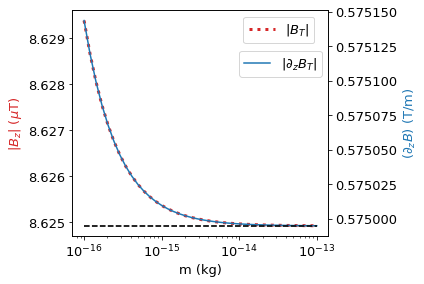

In [88]:
fig, ax1 = plt.subplots()
color = '#d62728'
ax1.plot(mass_range, np.multiply(B_z,1e6), color=color, linestyle='dotted', lw=3, label=r'$|B_T|$',zorder=2)
ax1.plot(mass_range, np.multiply(B_z_mdep,1e6), color='grey', linestyle='dashed', lw=1.5)
ax1.set_xlabel(r'm (kg)', size=13)
ax1.set_ylabel(r'$|B_z|$ ($\mu$T)', color=color, size=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.legend(fontsize=13, bbox_to_anchor=(0.97, 1))

ax2 = ax1.twinx()
color = '#1f77b4'
ax2.plot(mass_range, dB_z, color=color, linestyle='solid', lw=1.5, label=r'$|\partial_z B_T|$',zorder=1)
ax2.plot(mass_range, dB_z_mdep, color='black', linestyle='dashed', lw=1.5)
ax1.set_xlabel(r'm (kg)', size=13)
ax2.set_ylabel(r'$(\partial_z B)$ (T/m)', color=color, size=13)
ax2.tick_params(axis='both', labelsize=13)

ax2.legend(fontsize=13, bbox_to_anchor=(1, 0.85))
fig.tight_layout()
plt.xscale("log")
#plt.savefig('massdep_trap.pdf')
plt.show()

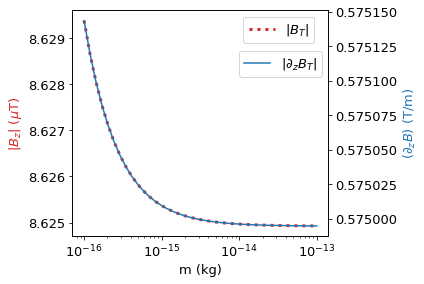

In [89]:
fig, ax1 = plt.subplots()
color = '#d62728'
ax1.plot(mass_range, np.multiply(B_z,1e6), color=color, linestyle='dotted', lw=3, label=r'$|B_T|$',zorder=2)
ax1.set_xlabel(r'm (kg)', size=13)
ax1.set_ylabel(r'$|B_z|$ ($\mu$T)', color=color, size=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.legend(fontsize=13, bbox_to_anchor=(0.97, 1))

ax2 = ax1.twinx()
color = '#1f77b4'
ax2.plot(mass_range, dB_z, color=color, linestyle='solid', lw=1.5, label=r'$|\partial_z B_T|$',zorder=1)
ax1.set_xlabel(r'm (kg)', size=13)
ax2.set_ylabel(r'$(\partial_z B)$ (T/m)', color=color, size=13)
ax2.tick_params(axis='both', labelsize=13)

ax2.legend(fontsize=13, bbox_to_anchor=(1, 0.85))
fig.tight_layout()
plt.xscale("log")
#plt.savefig('massdep_trap.pdf')
plt.show()

In [8]:
z_range = np.logspace(-7, -4, num=50, endpoint=True)
B_z, dB_z = [], []
mass = 10e-14

for i in range(len(z_range)):
    z = z_range[i]
    
    V_C, F_C = Casimir(mass, z)
    V_D, F_D = Dipole(dipmom_constant, 0, z)
    
    B_z.append(math.sqrt(2*mu0*(V_C+V_D)/(mass*chid))) 
    dB_z.append(mu0*(F_C+F_D)/(mass*chid*math.sqrt(2*mu0*(V_C+V_D)/(mass*chid))))

# plt.plot(z_range, B_z)
# plt.xscale("log")
# plt.show()

In [80]:
max(B_z),min(B_z),max(dB_z),min(dB_z)

(0.7762429031788403,
 7.762442423510513e-07,
 15524858.05017166,
 0.015524871441905348)

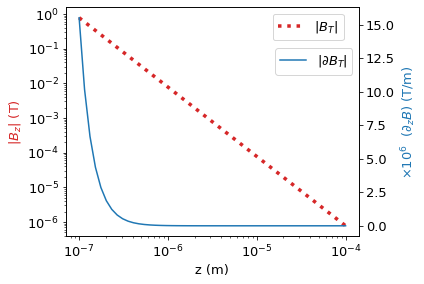

In [16]:
fig, ax1 = plt.subplots()
color = '#d62728'
ax1.plot(z_range, B_z, color=color, linestyle='dotted', lw=3.5, label=r'$|B_T|$',zorder=2)
ax1.set_xlabel(r'r (m)', size=13)
ax1.set_ylabel(r'$|B_z|$ (T)', color=color, size=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.legend(fontsize=13, bbox_to_anchor=(0.97, 1))
ax1.set_yscale('log')

ax2 = ax1.twinx()
color = '#1f77b4'
ax2.plot(z_range, np.multiply(dB_z,1e-6), color=color, linestyle='solid', lw=1.5, label=r'$|\partial B_T|$',zorder=1)
ax1.set_xlabel(r'z (m)', size=13)
ax2.set_ylabel(r'$\times 10^6 \,\, \, \, (\partial_z B)$ (T/m)', color=color, size=13)
ax2.tick_params(axis='both', labelsize=13)

ax2.legend(fontsize=13, bbox_to_anchor=(1, 0.85))
fig.tight_layout()
plt.xscale("log")
#plt.savefig('distance_trapdep.pdf')
plt.show()

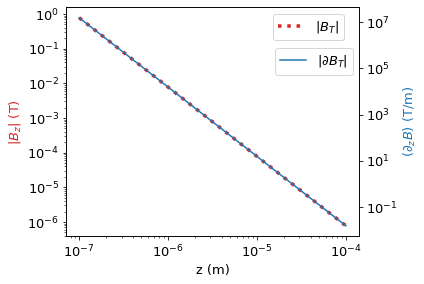

In [19]:
fig, ax1 = plt.subplots()
color = '#d62728'
ax1.plot(z_range, B_z, color=color, linestyle='dotted', lw=3.5, label=r'$|B_T|$',zorder=2)
ax1.set_xlabel(r'r (m)', size=13)
ax1.set_ylabel(r'$|B_z|$ (T)', color=color, size=13)
ax1.tick_params(axis='both', labelsize=13)
#ax1.set_ylim([0.085,0.120])
#ax1.set_xlim([0,3.5])
ax1.legend(fontsize=13, bbox_to_anchor=(0.97, 1))
ax1.set_yscale('log')

ax2 = ax1.twinx()
color = '#1f77b4'
ax2.plot(z_range, dB_z, color=color, linestyle='solid', lw=1.5, label=r'$|\partial B_T|$',zorder=1)
ax1.set_xlabel(r'z (m)', size=13)
ax2.set_ylabel(r'$(\partial_z B)$ (T/m)', color=color, size=13)
ax2.tick_params(axis='both', labelsize=13)
ax2.set_yscale('log')

ax2.legend(fontsize=13, bbox_to_anchor=(1, 0.85))
fig.tight_layout()
plt.xscale("log")
plt.savefig('distance_trapdep_log.pdf')
plt.show()

In [99]:
print(10**6*1e-5)

10.0


## Finding necessary delta x

In [3]:
hbar = scipy.constants.hbar
G = scipy.constants.G

In [4]:
def delta_x(mass,d,phi):
    delx2 = ((G*mass**2/hbar)/(-phi+G*mass**2/(d*hbar)))**2 - d**2
    return math.sqrt(delx2)

In [5]:
def delta_x_plot(mass,d,witness,gamma,t):
    phi1 = hbar*(2*gamma*t-witness)/(2*t)
    delx2 = (d*G*mass**2/(G*mass**2-phi1*d))**2-d**2
    return math.sqrt(abs(delx2))

In [8]:
gamma_list = np.logspace(-4,-1,100,endpoint=True)
deltax_list3 = []; deltax_list4 = []; deltax_list5 = []

for gamma in gamma_list:
    deltax_list3.append(delta_x_plot(1e-13, 21e-6, 0, gamma, 1))
    deltax_list4.append(delta_x_plot(1e-14, 21e-6, 0, gamma, 1))
    deltax_list5.append(delta_x_plot(1e-15, 21e-6, 0, gamma, 1))

In [9]:
print(max(deltax_list4))

5.548827048521034e-06


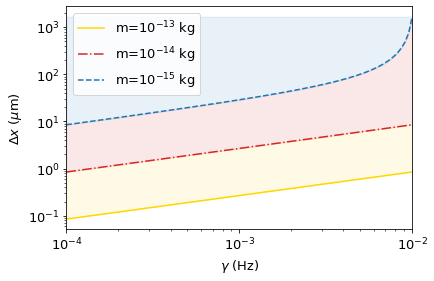

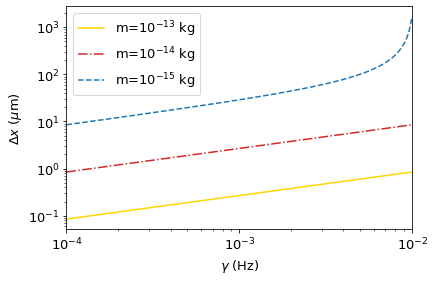

In [6]:
fig, ax1 = plt.subplots()
color = '#d62728'
color2 = '#1f77b4'
ax1.plot(gamma_list, np.multiply(deltax_list3,1e6), color='gold', linestyle='solid', lw=1.5, label=r'm=$10^{-13}$ kg')
ax1.plot(gamma_list, np.multiply(deltax_list4,1e6), color=color, linestyle='dashdot', lw=1.5, label=r'm=$10^{-14}$ kg')
ax1.plot(gamma_list, np.multiply(deltax_list5,1e6), color=color2, linestyle='dashed', lw=1.5, label=r'm=$10^{-15}$ kg')
ax1.fill_between(gamma_list,np.multiply(deltax_list4,1e6),np.multiply(deltax_list3,1e6),color='gold', alpha=0.1)
ax1.fill_between(gamma_list,np.multiply(deltax_list5,1e6),np.multiply(deltax_list4,1e6),color=color, alpha=0.1)
ax1.fill_between(gamma_list,np.multiply(max(deltax_list5),1e6),np.multiply(deltax_list5,1e6),color=color2, alpha=0.1)
ax1.set_xlabel(r'$\gamma$ (Hz)', size=13)
ax1.set_ylabel(r'$\Delta x$ ($\mu$m)',size=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.legend(fontsize=13)
fig.tight_layout()
plt.xscale("log")
plt.yscale("log")
#ax1.set_ylim([0,max(deltax_list5)*1e6])
ax1.set_xlim([min(gamma_list),max(gamma_list)])
#plt.savefig('delta_x_gamma.pdf')
plt.show()

fig, ax1 = plt.subplots()
color = '#d62728'
color2 = '#1f77b4'
ax1.plot(gamma_list, np.multiply(deltax_list3,1e6), color='gold', linestyle='solid', lw=1.5, label=r'm=$10^{-13}$ kg')
ax1.plot(gamma_list, np.multiply(deltax_list4,1e6), color=color, linestyle='dashdot', lw=1.5, label=r'm=$10^{-14}$ kg')
ax1.plot(gamma_list, np.multiply(deltax_list5,1e6), color=color2, linestyle='dashed', lw=1.5, label=r'm=$10^{-15}$ kg')
ax1.set_xlabel(r'$\gamma$ (Hz)', size=13)
ax1.set_ylabel(r'$\Delta x$ ($\mu$m)',size=13)
ax1.tick_params(axis='both', labelsize=13)
ax1.legend(fontsize=13)
fig.tight_layout()
plt.xscale("log")
plt.yscale("log")
#ax1.set_ylim([0,max(deltax_list5)*1e6])
ax1.set_xlim([min(gamma_list),max(gamma_list)])
#plt.savefig('delta_x_gamma_noshading.pdf')
plt.show()

Above plot is for a witness is zero, time is 1 second